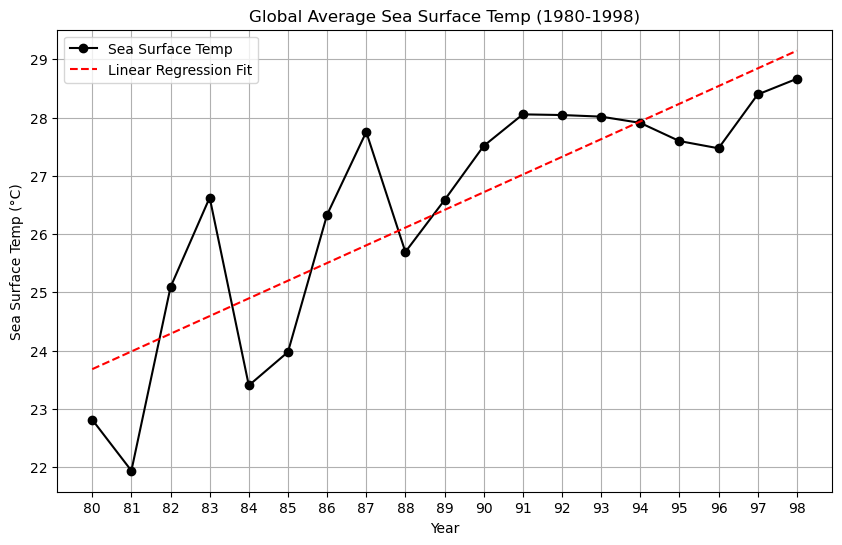

In [21]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from scipy.stats import linregress
import matplotlib.cm as cm

# Filepath to the CSV data
filepath = "data/elnino.csv"

# Reading the CSV data into a Pandas DataFrame with 'Observation' as the index
data = pd.read_csv(filepath, index_col='Observation')

# Stripping leading and trailing whitespaces from column names
data.columns = [col.strip() for col in data.columns]

# Converting specific columns to numeric format, handling errors by coercing to NaN
data['Sea Surface Temp'] = pd.to_numeric(data['Sea Surface Temp'], errors='coerce')
data['Latitude'] = pd.to_numeric(data['Latitude'], errors='coerce')
data['Longitude'] = pd.to_numeric(data['Longitude'], errors='coerce')
data['Zonal Winds'] = pd.to_numeric(data['Zonal Winds'], errors='coerce')
data['Meridional Winds'] = pd.to_numeric(data['Meridional Winds'], errors='coerce')
data['Humidity'] = pd.to_numeric(data['Humidity'], errors='coerce')
data['Air Temp'] = pd.to_numeric(data['Air Temp'], errors='coerce')

# Grouping data by 'Year' and calculating the mean of 'Sea Surface Temp' for each year
temp = data.groupby('Year')['Sea Surface Temp'].mean().values
year = data.Year.unique() 

# Creating a figure with a specific size of 10 by 6
plt.figure(figsize=(10, 6))

# Performing linear regression on the data
slope, intercept, rvalue, pvalue, stderr = linregress(year, temp)

# Storing years (index) in x_values
x_values = year

# Calculate linear regression fit (y = mx + b)
y_values = slope * x_values + intercept



# Plotting the Sea Surface Temperature data
plt.plot(year, temp, marker='o', linestyle='-', color='black', label='Sea Surface Temp')

# Plotting the linear regression fit
plt.plot(x_values, y_values, linestyle='--', color='r', label='Linear Regression Fit')
# Adding labels and title to the plot
plt.xlabel('Year')
plt.ylabel('Sea Surface Temp (°C)')
plt.title('Global Average Sea Surface Temp (1980-1998)')

# Setting x-axis ticks to show every year
plt.xticks(np.arange(min(year), max(year)+1, 1.0))

# Display the grid
plt.grid(True)
# Displaying the legend
plt.legend()
# Show plot
plt.show()

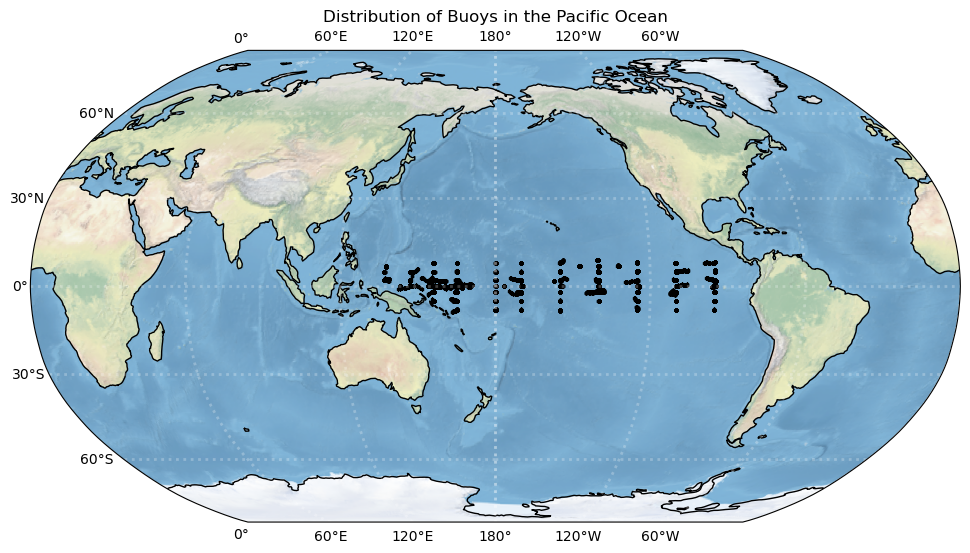

In [22]:
# Create a figure with a specific size of 12 by 8
fig = plt.figure(figsize=(12,8)) 
# Add a map projection to the axes using Robinson projection with a central longitude of 180
ax = plt.axes(projection = ccrs.Robinson(central_longitude=180)) 
# Add coastlines to the map with a resolution of 110m and black color
ax.coastlines(resolution = '110m', color='black')
# Add land feature with a face color of lemonchiffon
ax.add_feature(cfeature.LAND, facecolor='lemonchiffon')
# Set longitude and latitude formatters for the map
ax.xformatter=LONGITUDE_FORMATTER
ax.yformatter=LATITUDE_FORMATTER
# Scatter plot of buoy locations on the map with specific marker properties
ax.scatter(data.Longitude, data.Latitude, marker=',', s=1, 
    color="black", transform=ccrs.PlateCarree(),
)
# Set the map to a global view
ax.set_global()
# Add stock image (background image) to the map
ax.stock_img()
# Set the title of the plot
ax.set_title('Distribution of Buoys in the Pacific Ocean')
# Add gridlines to the map 
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='white', alpha=0.25, linestyle=':') # Add gridlines

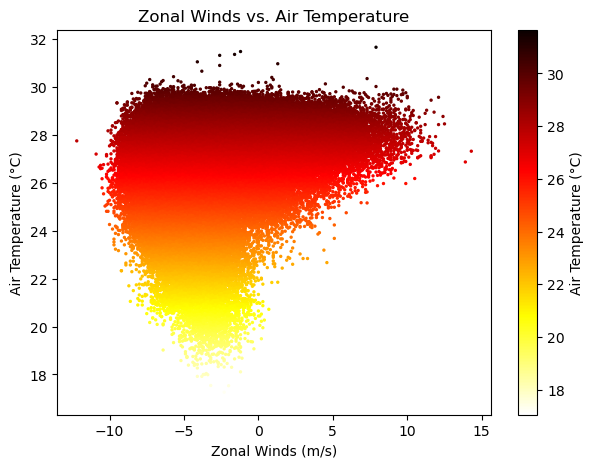

In [23]:
# Selecting specific columns from the original DataFrame
data_num = data[['Year','Latitude', 'Longitude', 'Zonal Winds', 'Meridional Winds', 'Humidity', 'Air Temp', 'Sea Surface Temp']]
# Removing rows with NaN values in 'Sea Surface Temp' and 'Air Temp' columns
data_num = data_num.dropna(subset=['Sea Surface Temp', 'Air Temp'])
# Creating subsets of data for the time periods 1980-1989 and 1990-1998
data_8089 = data_num.loc[(data.Year <= 89)]
data_9098 = data_num.loc[(data.Year >= 90)]

# Creating a subplot with one axis for the scatter plot
fig, ax1 = plt.subplots(1, 1, figsize = (7,5))
# Generating a scatter plot of 'Zonal Winds' vs. 'Air Temperature' with color coding based on 'Air Temp'
one = ax1.scatter(data_num['Zonal Winds'], data_num['Air Temp'], s=2, c=data_num['Air Temp'], cmap="hot_r")
# Setting title and axis labels for the scatter plot
ax1.set_title("Zonal Winds vs. Air Temperature")
ax1.set_xlabel("Zonal Winds (m/s)")
ax1.set_ylabel("Air Temperature (°C)")
# Adding a colorbar to the scatter plot to represent 'Air Temperature'
fig.colorbar(one, label='Air Temperature (°C)', cmap="hot_r", ax=ax1)

1.1004566027482845
-1.9206218913445845


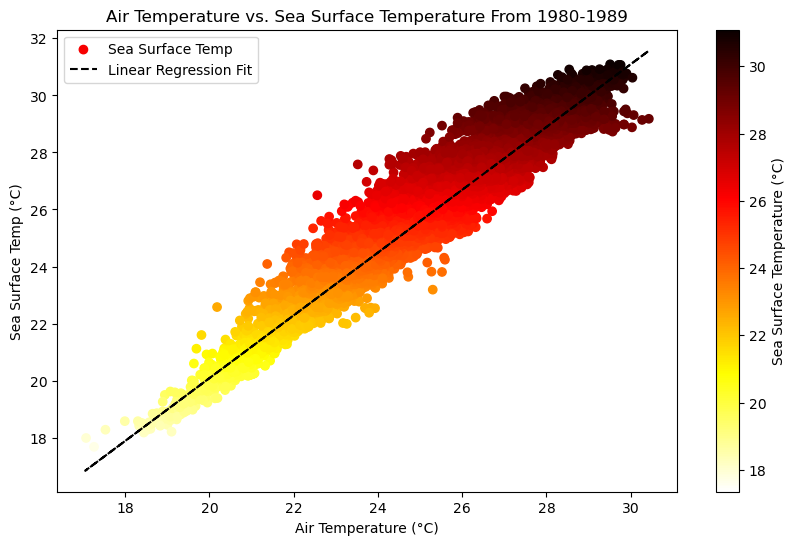

In [24]:
# Create a figure with a specific size of 10 by 6
plt.figure(figsize=(10, 6))

# Extract 'Air Temp' and 'Sea Surface Temp' data for the time period 1980-1989
airtemp = data_8089['Air Temp']
surfacetemp = data_8089['Sea Surface Temp'] 
# Perform linear regression on the data
slope, intercept, rvalue, pvalue, stderr = linregress(airtemp, surfacetemp)

# Store 'Air Temp' values in x_values
x_values = airtemp

# Calculate linear regression fit (y = mx + b)
y_values = slope * x_values + intercept

# Scatter plot of 'Air Temp' vs. 'Sea Surface Temp' with color coding based on 'Sea Surface Temp'
plt.scatter(airtemp, surfacetemp, marker='o', linestyle='-', label='Sea Surface Temp', c=surfacetemp, cmap="hot_r")
# Plot the linear regression fit
plt.plot(x_values, y_values, linestyle='--', color='black', label='Linear Regression Fit')
# Adding labels and title
plt.xlabel("Air Temperature (°C)")
plt.ylabel('Sea Surface Temp (°C)')
plt.title("Air Temperature vs. Sea Surface Temperature From 1980-1989")
# Display legend
plt.legend()
# Add colorbar to represent 'Sea Surface Temperature'
plt.colorbar(label='Sea Surface Temperature (°C)', cmap="hot_r")
# Print the slope and intercept of the linear regression fit
print(slope)
print(intercept)

1.0444125566390157
-0.32950253578331967


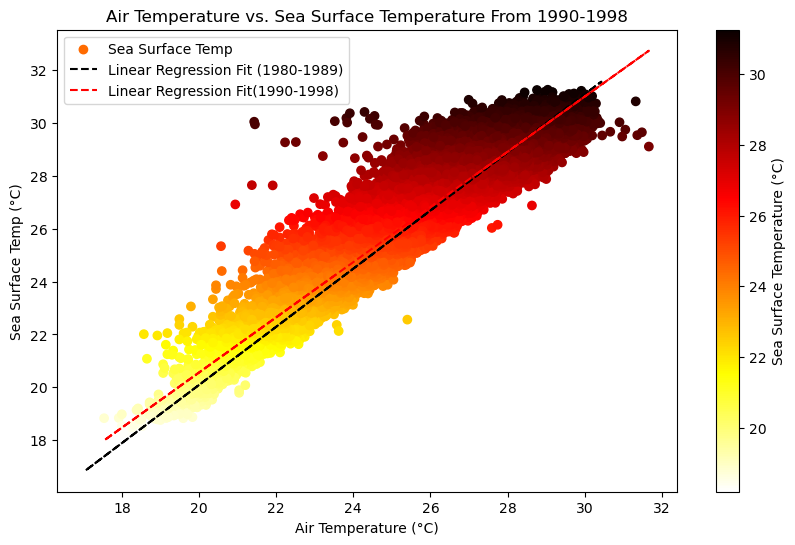

In [25]:
# Create a figure with a specific size of 10 by 6
plt.figure(figsize=(10, 6))

# Extract 'Air Temp' and 'Sea Surface Temp' data for the time period 1990-1998
airtemp = data_9098['Air Temp']
surfacetemp = data_9098['Sea Surface Temp'] 
# Perform linear regression on the data
slope, intercept, rvalue, pvalue, stderr = linregress(airtemp, surfacetemp)

# Store 'Air Temp' values in x_values
x_values1 = airtemp

# Calculate linear regression fit (y = mx + b)
y_values1 = slope * x_values1 + intercept


# Scatter plot of 'Air Temp' vs. 'Sea Surface Temp' with color coding based on 'Sea Surface Temp'
plt.scatter(airtemp, surfacetemp, marker='o', linestyle='-', label='Sea Surface Temp', c=surfacetemp, cmap="hot_r")
# Plot the linear regression fit for the 1980-1989 period
plt.plot(x_values, y_values, linestyle='--', color='black', label='Linear Regression Fit (1980-1989)')
# Plot the linear regression fit for the 1990-1998 period
plt.plot(x_values1, y_values1, linestyle='--', color='r', label='Linear Regression Fit(1990-1998)')
# Adding labels and title
plt.xlabel("Air Temperature (°C)")
plt.ylabel('Sea Surface Temp (°C)')
plt.title("Air Temperature vs. Sea Surface Temperature From 1990-1998")
# Display legend
plt.legend()
# Add colorbar to represent 'Sea Surface Temperature'
plt.colorbar(label='Sea Surface Temperature (°C)', cmap="hot_r")
# Print the slope and intercept of the linear regression fit for the 1990-1998 period
print(slope)
print(intercept)